<a href="https://colab.research.google.com/github/Amparwen/PF_Future24/blob/main/Analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
from datetime import datetime
from google.colab import drive
from matplotlib import pyplot as plt
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
employee_df=pd.read_csv('/content/drive/MyDrive/PYTHON/employee.csv')
project_df=pd.read_csv('/content/drive/MyDrive/PYTHON/projects.csv')
asignaciones_df=pd.read_csv('/content/drive/MyDrive/PYTHON/employee_projects.csv')


# Empleados


Top 5 empleados que más años llevan en la compañía

In [ ]:
# employee_df.columns
# Convertimos los datos de las columnas de fecha a tipo datetime
employee_df['F_ALTA'] = pd.to_datetime(employee_df['F_ALTA'])
employee_df['F_BAJA'] = pd.to_datetime(employee_df['F_BAJA'], errors='coerce')  # En los campos que vengan con null lo transformamos a NaT (Not a Time)

# Obtenemos la fecha actual
current_date = datetime.now()

# Calculamos el tiempo en la compañía (rellenamos los campos que no tienen fecha de baja con la fecha actual para poder hacer el cálculo)
employee_df['F_BAJA'] = employee_df['F_BAJA'].fillna(current_date)
employee_df['TIEMPO_EN_COMPANIA'] = employee_df['F_BAJA'] - employee_df['F_ALTA']

# Ordenamos por el tiempo en la compañía en orden descendente
employee_df = employee_df.sort_values(by='TIEMPO_EN_COMPANIA', ascending=False)

# Seleccionamos los 5 empleados que más tiempo llevan en la compañía
top_5_empleados = employee_df[['TX_NOMBRE','TX_APELLIDO1', 'TX_APELLIDO2','TIEMPO_EN_COMPANIA']].head(5)

# Mostrar los resultados
top_5_empleados

,TX_NOMBRE,TX_APELLIDO1,TX_APELLIDO2,TIEMPO_EN_COMPANIA
5,Roana,Mandal,Junkison,8604 days 17:58:29.922408
24,Palmer,Cosstick,Sawtell,8072 days 00:00:00
4,Cybill,Fincham,Pinchbeck,7848 days 17:58:29.922408
21,Alexis,Melling,Schneidar,7235 days 17:58:29.922408
3,Merv,Wessing,Pietrowski,6565 days 17:58:29.922408


Top 5 empleados más recientes

In [ ]:
# Siguiendo con el calculo anterior
# Ordenamos por el tiempo en la compañía en orden ascendente (de menos a mas tiempo)
employee_df = employee_df.sort_values(by='TIEMPO_EN_COMPANIA', ascending=True)
# Seleccionamos los 5 empleados que menos tiempo llevan en la compañía
top_5_empleados = employee_df[['TX_NOMBRE','TX_APELLIDO1', 'TX_APELLIDO2','TIEMPO_EN_COMPANIA']].head(5)
# Mostramos los resultados
top_5_empleados

,TX_NOMBRE,TX_APELLIDO1,TX_APELLIDO2,TIEMPO_EN_COMPANIA
25,Jennifer,Madrigal,Perez,4 days 17:07:34.456435
12,Ted,Maior,Battlestone,161 days 17:07:34.456435
0,Silva,Bril,Martinez,383 days 00:00:00
23,Tallou,Lucio,Meldrum,500 days 17:07:34.456435
11,Jocko,McGonigal,Arrighini,527 days 17:07:34.456435


Distribución del número de años de los empleados en la empresa

    Años  Empleados
0    0.0          2
1    1.0          3
2    2.0          1
3    3.0          2
4    5.0          2
5    8.0          3
6    9.0          1
7   10.0          3
8   11.0          1
9   12.0          1
10  18.0          3
11  20.0          1
12  21.0          1
13  22.0          1
14  24.0          1


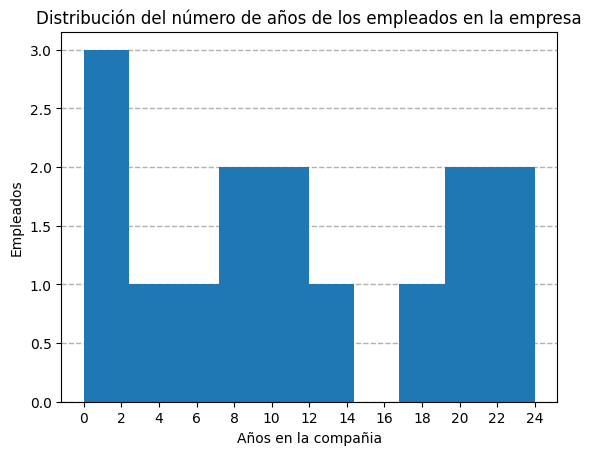

In [ ]:
#Calculamos los días que lleva cada empleado en la empresa
employee_df['TIEMPO_EN_COMPANIA'] = (employee_df['F_BAJA'] - employee_df['F_ALTA']).dt.days
#Calculamos los años de cada empleado en la empresa
employee_df['ANIOS_EN_COMPANIA'] =(employee_df['TIEMPO_EN_COMPANIA']/365.25).round(0)

#Agrupamos por años y contamos cuantos empleados hay por cada periodo
grouped=employee_df.groupby(['ANIOS_EN_COMPANIA']).size().reset_index()
# Damos nombre a las columnas que hemos creado
grouped.columns = ['Años', 'Empleados']
# Mostramos los resultados
print(grouped)

#Creamos un histograma
plt.hist(grouped['Años'], zorder=2)
plt.title('Distribución del número de años de los empleados en la empresa')
plt.xlabel('Años en la compañia')
plt.ylabel('Empleados')
plt.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0)#zorder = capa para que se vea por debajo de las barras
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24])
plt.show()

Evolución temporal de altas por años

     Año  Empleados
0   2000          3
1   2002          1
2   2003          2
3   2004          1
4   2005          2
5   2006          3
6   2007          1
7   2012          1
8   2013          1
9   2014          1
10  2015          2
11  2016          1
12  2018          2
13  2019          1
14  2022          1
15  2023          2
16  2024          1


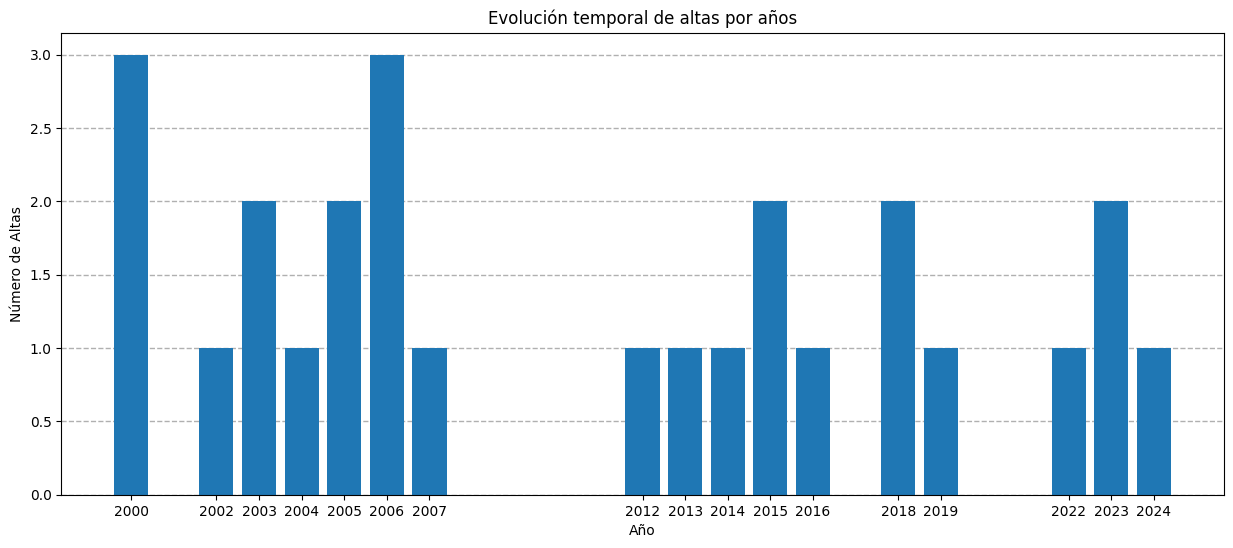

In [ ]:
# Nos aseguramos de que los datos estén en formato datetime
employee_df['F_ALTA'] = pd.to_datetime(employee_df['F_ALTA'])
# Extraemos el año de la fecha, contamos la frecuencia de cada año, ordenamos los datos por los años y convertimos la serie en un DataFrame al restablecer el índice
altas_por_anio = employee_df['F_ALTA'].dt.year.value_counts().sort_index().reset_index()


# Damos nombre a las columnas que hemos creado
altas_por_anio.columns = ['Año', 'Empleados']

print(altas_por_anio)
# # Creamos el gráfico de la evolución temporal de las altas por año
plt.figure(figsize=(15, 6))
plt.bar(altas_por_anio['Año'], altas_por_anio['Empleados'], zorder=2, align='center')
plt.title('Evolución temporal de altas por años')
plt.xlabel('Año')
plt.ylabel('Número de Altas')
plt.xticks(altas_por_anio['Año'])
plt.grid(True, axis='y', linestyle='--', linewidth=1, zorder=0)
plt.show()

Evolución temporal de bajas por años

    Año  Empleados
0  2004          1
1  2008          2
2  2010          1
3  2014          1
4  2015          1
5  2020          1
6  2022          1


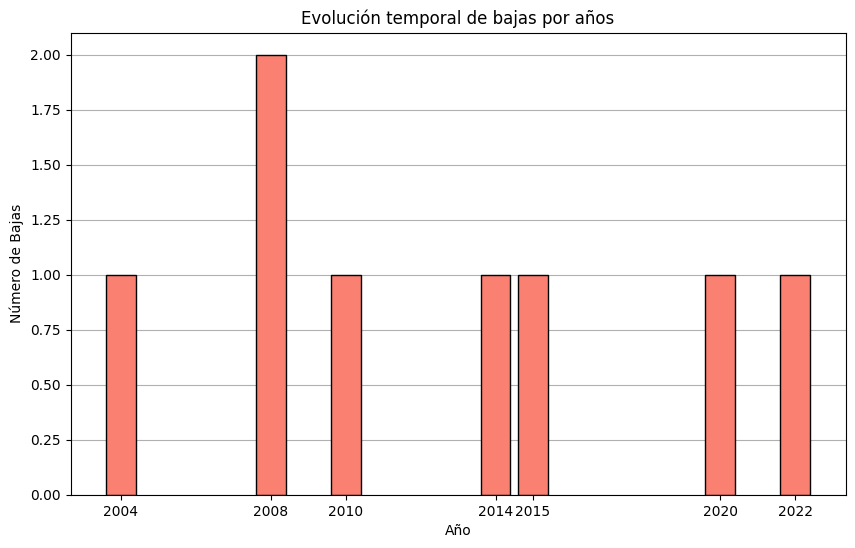

In [ ]:
#Reestablecemos los datos en el Dataframe de empleados
employee_df=pd.read_csv('/content/drive/MyDrive/PYTHON/employee.csv')

# Convertimos los datos de la columna F_BAJA en un tipo datetime
employee_df['F_BAJA'] = pd.to_datetime(employee_df['F_BAJA'], errors='coerce')

# Filtramos las filas donde F_BAJA no es NaN
bajas_validas = employee_df['F_BAJA'].dropna()

# Contamos el número de bajas por año y creamos un dataframe con los datos
bajas_por_anio = bajas_validas.dt.year.value_counts().sort_index().reset_index()
bajas_por_anio.columns = ['Año', 'Empleados']

# Mostramos los datos
print(bajas_por_anio)

# Creamos el gráfico de la evolución temporal de las bajas por año
plt.figure(figsize=(10, 6))
plt.bar(bajas_por_anio['Año'], bajas_por_anio['Empleados'], color='salmon', edgecolor='black', zorder=2, align='center')
plt.title('Evolución temporal de bajas por años')
plt.xlabel('Año')
plt.ylabel('Número de Bajas')
plt.grid(axis='y')
plt.xticks(bajas_por_anio['Año'])
plt.show()


¿Cuáles han sido los dos años de mayor crecimiento/decrecimiento de empleados?

In [ ]:

# Convertimos las columnas F_ALTA y F_BAJA a tipo datetime
employee_df['F_ALTA'] = pd.to_datetime(employee_df['F_ALTA'])
employee_df['F_BAJA'] = pd.to_datetime(employee_df['F_BAJA'], errors='coerce')

# Contamos altas y bajas por año
altas_por_anio = employee_df['F_ALTA'].dt.year.value_counts().sort_index().reset_index()
altas_por_anio.columns = ['Año', 'Altas']
# print(altas_por_anio)

bajas_por_anio = employee_df['F_BAJA'].dropna().dt.year.value_counts().sort_index().reset_index()
bajas_por_anio.columns = ['Año', 'Bajas']
# print(bajas_por_anio)

# Unimos las altas y bajas por año en un solo DataFrame
crecimiento_df = pd.merge(altas_por_anio, bajas_por_anio, on='Año', how='outer').fillna(0)
crecimiento_df['Altas'] = crecimiento_df['Altas'].astype(int)
crecimiento_df['Bajas'] = crecimiento_df['Bajas'].astype(int)
crecimiento_df['Crecimiento_Neto'] = crecimiento_df['Altas'] - crecimiento_df['Bajas']

# Calcular el crecimiento/decrecimiento
crecimiento_df['Cambio_Anual'] = crecimiento_df['Crecimiento_Neto'].diff().fillna(0).astype(int)

# Obtener los dos años con mayor crecimiento y decrecimiento
mayor_crecimiento = crecimiento_df.sort_values(by='Cambio_Anual', ascending=False).head(2)
mayor_decrecimiento = crecimiento_df.sort_values(by='Cambio_Anual').head(2)

print("Años de mayor crecimiento:")
print(mayor_crecimiento)

print("Años de mayor decrecimiento:")
print(mayor_decrecimiento)

Años de mayor crecimiento:
     Año  Altas  Bajas  Crecimiento_Neto  Cambio_Anual
4   2005      2      0                 2             2
15  2023      2      0                 2             2
Años de mayor decrecimiento:
     Año  Altas  Bajas  Crecimiento_Neto  Cambio_Anual
17  2008      0      2                -2            -3
1   2002      1      0                 1            -2



- Distribución de empleados solteros vs casados


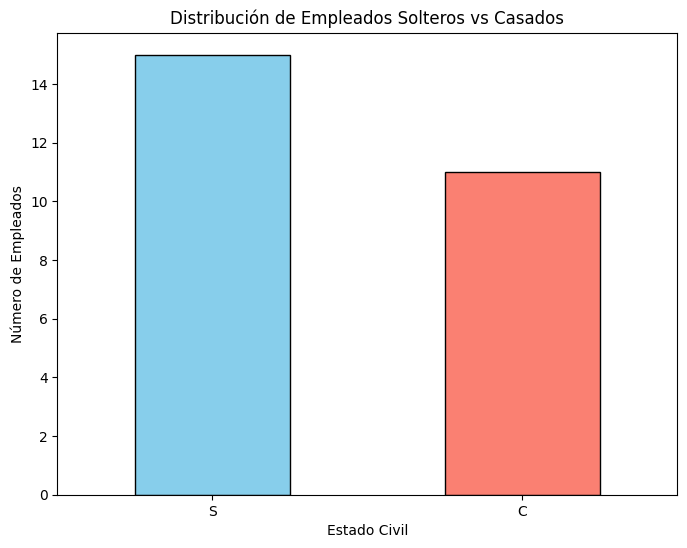

In [ ]:
# Contar empleados solteros vs casados
distribucion_edocivil = employee_df['CX_EDOCIVIL'].value_counts()

# Crear el gráfico de distribución
plt.figure(figsize=(8, 6))
distribucion_edocivil.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Distribución de Empleados Solteros vs Casados')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Empleados')
plt.xticks(rotation=0)
plt.show()

- Distribución de la edad de los empleados

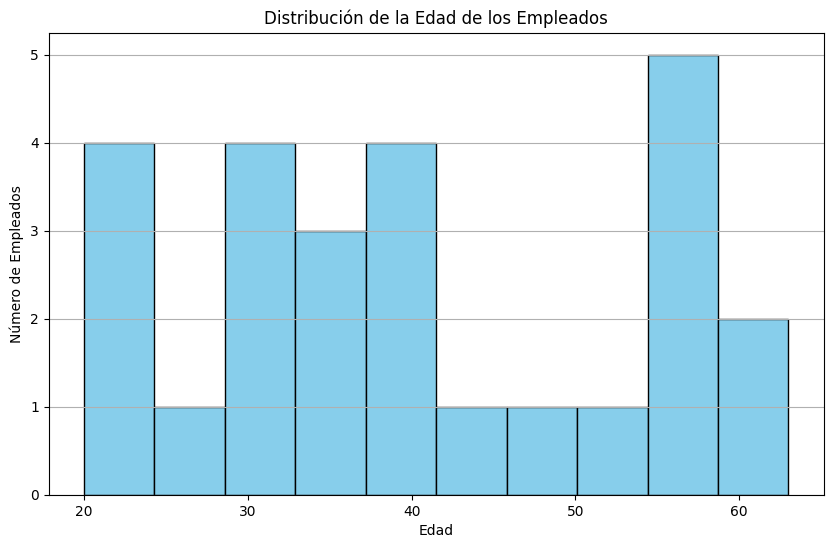

In [ ]:
# Calcular la edad de los empleados
employee_df['F_NACIMIENTO'] = pd.to_datetime(employee_df['F_NACIMIENTO'])
current_date = pd.to_datetime('today')
employee_df['Edad'] = (current_date - employee_df['F_NACIMIENTO']).dt.days // 365

# Crear el histograma de la distribución de la edad
plt.figure(figsize=(10, 6))
plt.hist(employee_df['Edad'], bins=10, edgecolor='black', color='skyblue')
plt.title('Distribución de la Edad de los Empleados')
plt.xlabel('Edad')
plt.ylabel('Número de Empleados')
plt.grid(axis='y')
plt.show()

 Edad media y desviación típica de los empleados

In [ ]:
# Calcular la edad media y la desviación estándar
edad_media = employee_df['Edad'].mean()
desviacion_estandar = employee_df['Edad'].std()

print(f'Edad media de los empleados: {edad_media:.2f} años')
print(f'Desviación estándar de la edad de los empleados: {desviacion_estandar:.2f} años')

Edad media de los empleados: 40.00 años
Desviación estándar de la edad de los empleados: 13.14 años


# Proyectos

Número de proyectos activos, finalizados y total

In [ ]:
# Convertir las columnas de fechas a tipo datetime
project_df['F_INICIO'] = pd.to_datetime(project_df['F_INICIO'])
project_df['F_FIN'] = pd.to_datetime(project_df['F_FIN'])
project_df['F_BAJA'] = pd.to_datetime(project_df['F_BAJA'], errors='coerce')
# Calcular el número de proyectos finalizados (fecha de fin menor a la fecha actual)
current_date = pd.to_datetime('today')
proyectos_finalizados = project_df[project_df['F_FIN'] < current_date].shape[0]

# Calcular el número de proyectos activos (fecha de fin mayor o igual a la fecha actual y no tienen fecha de baja)
proyectos_activos = project_df[(project_df['F_FIN'] >= current_date) & (project_df['F_BAJA'].isna())].shape[0]

# Calcular el número total de proyectos
proyectos_totales = project_df.shape[0]

print(f'Número de proyectos activos: {proyectos_activos}')
print(f'Número de proyectos finalizados: {proyectos_finalizados}')
print(f'Número total de proyectos: {proyectos_totales}')

Número de proyectos activos: 5
Número de proyectos finalizados: 1
Número total de proyectos: 6


Distribución de la duración de los proyectos (histograma)

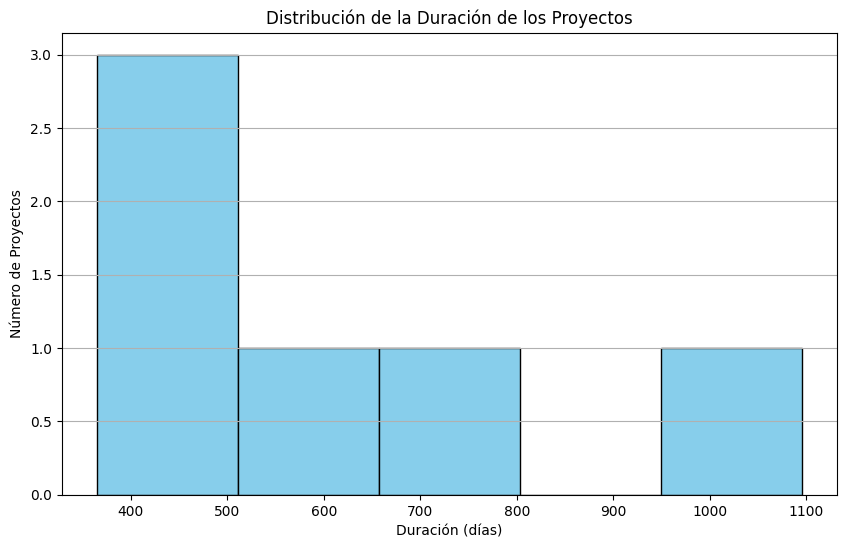

In [ ]:
# Calcular la duración de los proyectos en días
project_df['DURACION_DIAS'] = (project_df['F_FIN'] - project_df['F_INICIO']).dt.days

# Crear el histograma de la duración de los proyectos
plt.figure(figsize=(10, 6))
plt.hist(project_df['DURACION_DIAS'], bins=5, edgecolor='black', color='skyblue')
plt.title('Distribución de la Duración de los Proyectos')
plt.xlabel('Duración (días)')
plt.ylabel('Número de Proyectos')
plt.grid(axis='y')
plt.show()


Distribución de proyectos por lugar

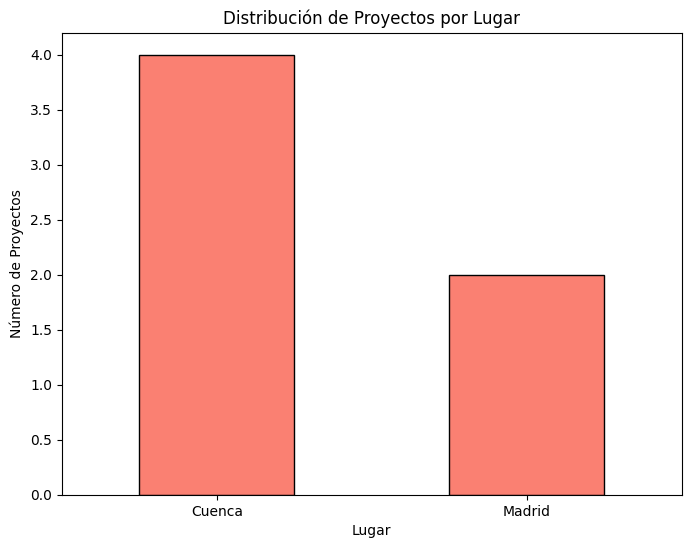

In [ ]:
# Contar el número de proyectos por lugar
proyectos_por_lugar = project_df['TX_LUGAR'].value_counts()

# Crear el gráfico de barras de la distribución de proyectos por lugar
plt.figure(figsize=(8, 6))
proyectos_por_lugar.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribución de Proyectos por Lugar')
plt.xlabel('Lugar')
plt.ylabel('Número de Proyectos')
plt.xticks(rotation=0)
plt.show()



# Proyectos y Empleados

Distribuir el número de proyectos a los que están asignados los empleados en activo

In [ ]:
# Calcular el número de proyectos a los que está asignado cada empleado
proyectos_por_empleado = asignaciones_df.groupby('ID_EMPLEADO')['ID_PROYECTO'].nunique()

# Calcular la distribución del número de proyectos
distribucion_proyectos = proyectos_por_empleado.value_counts().sort_index()

# Convertir a un DataFrame para mejor visualización
distribucion_proyectos_df = distribucion_proyectos.reset_index()
distribucion_proyectos_df.columns = ['Número de proyectos', 'Número de empleados']

# Mostrar el resultado
distribucion_proyectos_df



,Número de proyectos,Número de empleados
0,1,5
1,2,1
2,3,7
3,4,3
4,5,2


Top 5 proyectos con más personas asignadas

In [ ]:
# Contar el número de empleados asignados a cada proyecto
empleados_por_proyecto = asignaciones_df['ID_PROYECTO'].value_counts().reset_index()
empleados_por_proyecto.columns = ['ID_PROYECTO', 'Número de Empleados']

# Obtener los top 5 proyectos con más personas asignadas
top_5_proyectos = empleados_por_proyecto.head(5)

# Mostrar los top 5 proyectos
print(top_5_proyectos)


   ID_PROYECTO  Número de Empleados
0          152                   10
1          154                   10
2          102                    9
3          156                    9
4          153                    8


Lista de proyectos sin personas asignadas (detección de anomalía)

In [ ]:
# Identificar proyectos sin personas asignadas
proyectos_sin_asignacion = project_df[~project_df['ID_PROYECTO'].isin(asignaciones_df['ID_PROYECTO'])]

# Mostrar proyectos sin personas asignadas
print(proyectos_sin_asignacion)


Empty DataFrame
Columns: [ID_PROYECTO, F_INICIO, F_FIN, F_BAJA, TX_LUGAR, TX_OBSERVACIONES, TX_DESCRIPCION]
Index: []
